In [33]:
# reas the files called cyclist dataset annotations_STRC_update.csv

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cyclist_dataset = pd.read_csv('1_Bayesian_regression_model/cyclist_dataset_annotations_STRC24_updated.csv')

In [34]:
cyclist_dataset.describe()

,ebike,traditional,Female,Male,classic,hybrid,race,helmet,torso_angle,arm_angle
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.304167,0.695833,0.375000,0.620833,0.437500,0.454167,0.104167,0.737500,25.362061,41.673799
std,0.461015,0.461015,0.485135,0.486194,0.497115,0.498935,0.306115,0.440912,12.330572,11.627190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363156,9.764404
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.939644,34.268080
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,24.886704,40.346950
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,33.871829,48.251623
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.769600,78.863960


In [35]:
cyclist_dataset.head()

,object_id,ebike,traditional,Female,Male,classic,hybrid,race,helmet,torso_angle,arm_angle
0,GH010528_10525,0,1,0,1,0,0,1,1,38.513040,31.871464
1,GH010528_15009,0,1,0,1,0,0,1,1,37.413597,35.502655
2,GH010528_1514,0,1,0,1,0,0,1,0,32.075565,36.974422
3,GH010528_2383,0,1,0,1,0,0,1,1,50.433167,38.581680
4,GH010529_2124,0,1,0,1,0,0,1,0,45.214546,31.207440


In [36]:
cyclist_dataset.columns

Index(['object_id', 'ebike', 'traditional', 'Female', 'Male', 'classic',
       'hybrid', 'race', 'helmet', 'torso_angle', 'arm_angle'],
      dtype='object')

# Helmeted

In [73]:
# count in cyclist dataset how many instances of helmet are there

helmeted= cyclist_dataset['helmet'].value_counts()
# compute the percentage over total 
total_helmet = helmeted/len(cyclist_dataset)
total_helmet
helmeted

helmet
1    177
0     63
Name: count, dtype: int64

# Sex 

In [38]:
cyclist_dataset['Female'].value_counts()

Female
0    150
1     90
Name: count, dtype: int64

In [39]:
cyclist_dataset['Male'].value_counts()

Male
1    149
0     91
Name: count, dtype: int64

In [40]:
# count "females" and "males" columns in the dataset
females = cyclist_dataset['Female'].sum()
males = cyclist_dataset['Male'].sum()

print("Females:", females, "Males:", males )
percentage_female = round(100* (females / (females+ males)), 1)
percentage_male =round(100* (  males / (females+ males)),1 )
print(percentage_female, percentage_male)

Females: 90 Males: 149
37.7 62.3


# Bike type

In [70]:
hybrid = cyclist_dataset['hybrid'].sum()
race = cyclist_dataset['race'].sum()
classic = cyclist_dataset['classic'].sum()


percentage_race =  round(100* (race / (race+ hybrid + classic)), 1)
percentage_hybrid = round( 100* (hybrid / (race+ hybrid + classic)), 1)
percentage_classic =  round(100* (classic / (race+ hybrid + classic)), 1)

print(classic, hybrid, race )


105 109 25


# e-bike count

In [71]:
traditional = cyclist_dataset['traditional'].sum()
ebike = cyclist_dataset['ebike'].sum()

percentage_traditional = round(100* (traditional / (traditional+ ebike)), 1)
percentage_ebike =round(100* (  ebike / (traditional+ ebike)), 1)
print(ebike)

73


# FEMALE INTERSECTION WITH BIKE TYPE. HELMET AND EBIKE. 

In [77]:
female_classic = cyclist_dataset[(cyclist_dataset['Female'] == 1) & (cyclist_dataset['classic'] == 1)].shape[0]
female_hybrid = cyclist_dataset[(cyclist_dataset['Female'] == 1) & (cyclist_dataset['hybrid'] == 1)].shape[0]
female_race = cyclist_dataset[(cyclist_dataset['Female'] == 1) & (cyclist_dataset['race'] == 1)].shape[0]
print(female_classic, female_hybrid, female_race)
print(female_classic/females, female_hybrid/females, female_race/females)

57 31 2
0.6333333333333333 0.34444444444444444 0.022222222222222223


In [78]:
female_ebike = cyclist_dataset[(cyclist_dataset['Female'] == 1) & (cyclist_dataset['ebike'] == 1)].shape[0]
female_helmet = cyclist_dataset[(cyclist_dataset['Female'] == 1) & (cyclist_dataset['helmet'] == 1)].shape[0]

print(female_ebike, female_helmet, )
print(female_ebike/females, female_helmet/females)

35 67
0.3888888888888889 0.7444444444444445


# FEMALE INTERSECTION WITH BIKE TYPE. HELMET AND EBIKE. 

In [80]:
males

149

In [79]:
male_classic = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['classic'] == 1)].shape[0]
male_hybrid = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['hybrid'] == 1)].shape[0]
male_race = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['race'] == 1)].shape[0]
print(male_classic, male_hybrid, male_race)
print(male_classic/males, male_hybrid/males, male_race/males)

48 78 23
0.3221476510067114 0.5234899328859061 0.15436241610738255


In [82]:
male_ebike = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['ebike'] == 1)].shape[0]
male_helmet = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['helmet'] == 1)].shape[0]

print(male_ebike, male_helmet, )
print(male_ebike/males, male_helmet/males)

37 110
0.2483221476510067 0.738255033557047


In [43]:
## FEMALE CLASSIC
female_classic = cyclist_dataset[(cyclist_dataset['Female'] == 1) & (cyclist_dataset['classic'] == 1)].shape[0]
female_classic_count = round(female_classic / (classic),1) 
## MALE CLASSIC
male_classic = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['classic'] == 1)].shape[0]
male_classic_count = round(male_classic / (classic),1) 
female_classic_count, male_classic_count

(0.5, 0.5)

In [44]:
## FEMALE hybrid
female_hybrid = cyclist_dataset[(cyclist_dataset['Female'] == 1) & (cyclist_dataset['hybrid'] == 1)].shape[0]
female_hybrid_count = round(female_hybrid / hybrid,2) 
## MALE hybrid
male_hybrid = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['hybrid'] == 1)].shape[0]
male_hybrid_count = round(male_hybrid / hybrid,2) 
female_hybrid_count, male_hybrid_count

(0.28, 0.72)

In [45]:
## FEMALE race
female_race = cyclist_dataset[(cyclist_dataset['Female'] == 1) & (cyclist_dataset['race'] == 1)].shape[0]
female_race_count = round(female_race / race ,2) 
## MALE race
male_race = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['race'] == 1)].shape[0]
male_race_count = round(male_race / race ,2) 
female_race_count, male_race_count

(0.08, 0.92)

In [46]:
## FEMALE ebike
female_ebike = cyclist_dataset[(cyclist_dataset['Female'] == 1) & (cyclist_dataset['ebike'] == 1)].shape[0]
female_ebike_count = round(female_ebike / ebike,2) 
## MALE ebike
male_ebike = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['ebike'] == 1)].shape[0]
male_ebike_count = round(male_ebike / ebike,2)
female_ebike_count, male_ebike_count

(0.48, 0.51)

# Sanity check

In [47]:
# Compare male classic and male hybrid sample in cyclist dataset
# from cyclist dataset extract a dataframe where male == 1 and classic == 1
male_classic = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['classic'] == 1)]
male_classic.describe()

,ebike,traditional,Female,Male,classic,hybrid,race,helmet,torso_angle,arm_angle
count,48.000000,48.000000,48.0,48.0,48.0,48.0,48.0,48.000000,48.000000,48.000000
mean,0.291667,0.708333,0.0,1.0,1.0,0.0,0.0,0.458333,17.307444,42.908487
std,0.459340,0.459340,0.0,0.0,0.0,0.0,0.0,0.503534,9.492997,10.920719
min,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.000000,0.683283,19.058846
25%,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.000000,10.212338,37.029059
50%,0.000000,1.000000,0.0,1.0,1.0,0.0,0.0,0.000000,17.523920,41.266590
75%,1.000000,1.000000,0.0,1.0,1.0,0.0,0.0,1.000000,23.548271,47.667435
max,1.000000,1.000000,0.0,1.0,1.0,0.0,0.0,1.000000,44.541996,78.863960


In [48]:
male_hybrid = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['hybrid'] == 1)]
male_hybrid.describe()

,ebike,traditional,Female,Male,classic,hybrid,race,helmet,torso_angle,arm_angle
count,78.000000,78.000000,78.0,78.0,78.0,78.0,78.0,78.000000,78.000000,78.000000
mean,0.294872,0.705128,0.0,1.0,0.0,1.0,0.0,0.871795,31.520921,38.012001
std,0.458936,0.458936,0.0,0.0,0.0,0.0,0.0,0.336482,8.985539,10.447336
min,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.000000,11.249956,17.290617
25%,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.000000,24.998273,32.444307
50%,0.000000,1.000000,0.0,1.0,0.0,1.0,0.0,1.000000,30.876733,36.264137
75%,1.000000,1.000000,0.0,1.0,0.0,1.0,0.0,1.000000,39.029214,41.802081
max,1.000000,1.000000,0.0,1.0,0.0,1.0,0.0,1.000000,52.659370,77.926270


In [49]:
male_race = cyclist_dataset[(cyclist_dataset['Male'] == 1) & (cyclist_dataset['race'] == 1)]
male_race.describe()

,ebike,traditional,Female,Male,classic,hybrid,race,helmet,torso_angle,arm_angle
count,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.000000,23.000000,23.000000
mean,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.869565,41.717499,33.226243
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344350,6.759732,7.295473
min,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,31.899734,16.510250
25%,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,37.496487,29.953083
50%,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,41.899190,35.262722
75%,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,45.176073,38.686644
max,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,56.769600,42.723846


# Regression plots

In [100]:
# read data from the posterior samples of the torso model
torso_posterior = pd.read_csv('Bayesian_regression/torso_posterior_samples_update_malebaseline_new.csv')

In [101]:
torso_posterior.describe()

,b_Intercept,b_genderFemale,b_bikehybrid,b_bikerace,b_ebikeebike,b_genderFemale:bikehybrid,b_genderFemale:bikerace,sigma,lprior,lp__,...,.iteration,.draw,baseline_male_classic_traditional,female_classic_traditional,male_hybrid_traditional,male_race_traditional,male_classic_ebike,female_hybrid_traditional,female_race_traditional,female_classic_ebike
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,19.507438,-0.451006,14.197776,22.223172,-7.350584,-3.140119,-8.384850,8.385422,-6.570789,-851.319988,...,1500.500000,6000.50000,19.507438,19.056432,33.705214,41.730610,12.156854,30.114089,32.894753,11.705847
std,1.257185,1.653048,1.516128,2.124551,1.212526,2.408529,6.392459,0.395571,0.027179,2.020323,...,866.061442,3464.24595,1.257185,1.224472,1.007954,1.725424,1.494538,1.573446,5.992631,1.309174
min,14.814518,-7.342456,7.799827,13.821433,-12.490854,-13.154725,-36.866256,7.041455,-6.704866,-865.479769,...,1.000000,1.00000,14.814518,14.439130,29.802402,34.893608,6.087045,23.894480,8.689476,7.008619
25%,18.661733,-1.582408,13.188955,20.779060,-8.173236,-4.751125,-12.696394,8.108684,-6.587929,-852.424455,...,750.750000,3000.75000,18.661733,18.224630,33.035291,40.572328,11.167679,29.073789,28.930678,10.825836
50%,19.520421,-0.470215,14.184406,22.228321,-7.360104,-3.106440,-8.372815,8.372073,-6.569426,-850.993260,...,1500.500000,6000.50000,19.520421,19.053548,33.702473,41.726653,12.163266,30.104153,32.909190,11.704754
75%,20.359707,0.664218,15.193680,23.651681,-6.535905,-1.513096,-4.107746,8.642056,-6.551758,-849.839101,...,2250.250000,9000.25000,20.359707,19.887759,34.384315,42.887583,13.147274,31.146845,36.923000,12.589968
max,24.852228,6.011150,20.032278,32.403863,-2.810421,6.935339,17.073720,10.196627,-6.483980,-847.533141,...,3000.000000,12000.00000,24.852228,23.742325,37.654368,49.620947,18.254303,36.851671,56.195425,16.608882


In [102]:
torso_posterior.head()

,b_Intercept,b_genderFemale,b_bikehybrid,b_bikerace,b_ebikeebike,b_genderFemale:bikehybrid,b_genderFemale:bikerace,sigma,lprior,lp__,...,.iteration,.draw,baseline_male_classic_traditional,female_classic_traditional,male_hybrid_traditional,male_race_traditional,male_classic_ebike,female_hybrid_traditional,female_race_traditional,female_classic_ebike
0,18.750025,-0.331351,14.540615,22.779863,-6.627514,-1.656439,-9.201077,8.147528,-6.552662,-848.172651,...,1,1,18.750025,18.418675,33.290641,41.529888,12.122512,31.302851,31.997461,11.791161
1,19.162294,1.313074,14.192627,22.195430,-6.385108,-3.170054,-15.219715,7.873344,-6.538717,-850.911745,...,2,2,19.162294,20.475368,33.354922,41.357725,12.777186,31.497942,27.451083,14.090260
2,18.783252,1.424865,16.873068,24.152481,-8.359222,-9.241370,-10.940789,8.549678,-6.581764,-851.643858,...,3,3,18.783252,20.208117,35.656320,42.935733,10.424029,27.839815,33.419808,11.848894
3,19.065131,-0.403599,13.852990,24.958464,-6.360589,-4.524836,-11.177231,8.088154,-6.548436,-849.529992,...,4,4,19.065131,18.661532,32.918122,44.023596,12.704542,27.989686,32.442765,12.300943
4,19.941967,0.119591,13.251135,18.152184,-7.875636,-2.052624,-6.677692,8.294479,-6.562154,-850.343774,...,5,5,19.941967,20.061558,33.193103,38.094151,12.066332,31.260069,31.536050,12.185922


In [103]:
torso_posterior.columns

Index(['b_Intercept', 'b_genderFemale', 'b_bikehybrid', 'b_bikerace',
       'b_ebikeebike', 'b_genderFemale:bikehybrid', 'b_genderFemale:bikerace',
       'sigma', 'lprior', 'lp__', '.chain', '.iteration', '.draw',
       'baseline_male_classic_traditional', 'female_classic_traditional',
       'male_hybrid_traditional', 'male_race_traditional',
       'male_classic_ebike', 'female_hybrid_traditional',
       'female_race_traditional', 'female_classic_ebike'],
      dtype='object')

In [143]:
# Rename the columns of torso_posterior
torso_posterior_ = torso_posterior[['baseline_male_classic_traditional','female_classic_traditional','male_hybrid_traditional','female_hybrid_traditional', 'male_race_traditional','female_race_traditional','male_classic_ebike','female_classic_ebike']] # only select relevant columns
torso_posterior_.columns = ["Classic Male", "Classic Female", "Hybrid Male","Hybrid Female", "Race Male","Race Female", "Ebike Male", "Ebike Female"]

In [144]:
# Melt the dataframe to long format for seaborn
torso_posterior_melted = torso_posterior_.melt(var_name='variable', value_name='value')
columns_list = ["Classic Male", "Classic Female", "Hybrid Male","Hybrid Female", "Race Male","Race Female", "Ebike Classic Male", "Ebike Classic Female"]

In [146]:
torso_posterior_melted["variable"].value_counts()

variable
Classic Male      12000
Classic Female    12000
Hybrid Male       12000
Hybrid Female     12000
Race Male         12000
Race Female       12000
Ebike Male        12000
Ebike Female      12000
Name: count, dtype: int64

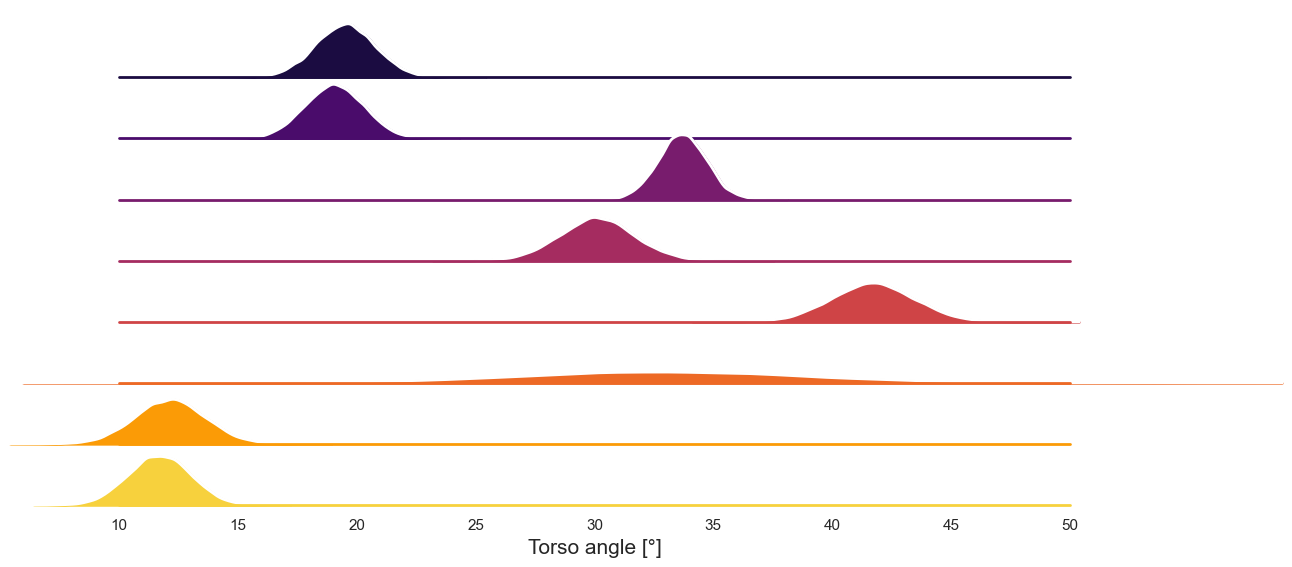

In [161]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='inferno', n_colors=8)
# pal = ["royalblue", "indianred", "forestgreen" ,"seagreen", "mediumseagreen"]
# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(torso_posterior_melted, row='variable', hue="variable", aspect=14, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'value',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'value', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
# here we add a vertical line for each plot
g.map(plt.axvline, x=0,
      lw=2, clip_on=True, color='gray')

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
# for i, ax in enumerate(g.axes.flat):
#     ax.text(51, 0.02, columns_list[i],
#             fontweight='bold', fontsize=15,
#             color=ax.lines[-1].get_color())


# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.1)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(10, 50))

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Torso angle [°]', fontsize=15)
# g.fig.suptitle('Torso position',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

# save fig with now background
g.savefig('torso_posterior_samples_update.png', dpi=300, bbox_inches='tight', transparent=True)

In [162]:
# select on the "classic male" colum variable form the posterior_torso_melted

first_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Classic Male"]
# Add zeor values for the other variable names for the same column
second_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Classic Female"]
third_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Hybrid Male"]
fourth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Hybrid Female"]
fifth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Race Male"]
sixth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Race Female"]
seventh_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Ebike Male"]
eighth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Ebike Female"]

# second_column.loc[:,"value"] = 0
third_column.loc[:,"value"] = 0
fourth_column.loc[:,"value"] = 0
fifth_column.loc[:,"value"] = 0
sixth_column.loc[:,"value"] = 0
seventh_column.loc[:,"value"] = 0
eighth_column.loc[:,"value"] = 0
concatenated = pd.concat([first_column ,second_column, third_column, fourth_column, fifth_column,sixth_column,seventh_column,eighth_column])

In [163]:
concatenated.variable.value_counts()

variable
Classic Male      12000
Classic Female    12000
Hybrid Male       12000
Hybrid Female     12000
Race Male         12000
Race Female       12000
Ebike Male        12000
Ebike Female      12000
Name: count, dtype: int64

c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData

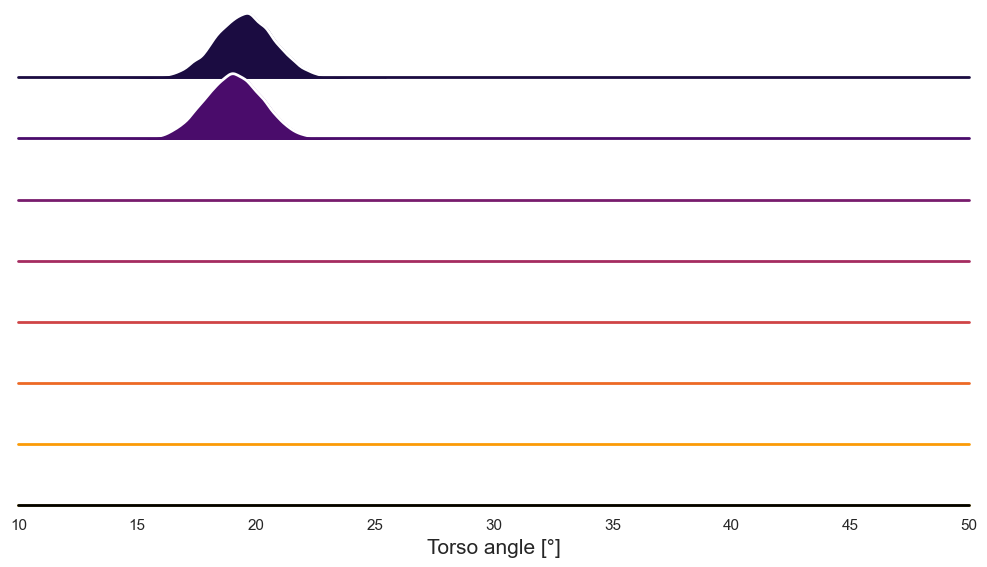

In [164]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='inferno', n_colors=8)
#pal = ["white", "white", "white" ,"white", "white"]
# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(concatenated, row='variable', hue="variable", aspect=14, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'value',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'value', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
# here we add a vertical line for each plot
g.map(plt.axvline, x=0,
      lw=2, clip_on=True, color='gray')

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# here we add a horizontal line for each plot

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
#for i, ax in enumerate(g.axes.flat):
#     ax.text(24.5, 0.02, columns_list[i],
#             fontweight='bold', fontsize=15,
#             color=ax.lines[-1].get_color())

plt.axhline(y=0,      lw=2, clip_on=False, color='black')
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.1)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(10, 50))

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Torso angle [°]', fontsize=15)
# g.fig.suptitle('Torso position',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

# save fig with now background
g.savefig('torso_posterior_samples_update2.png', dpi=300, bbox_inches='tight', transparent=True)

In [181]:
first_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Classic Male"]
second_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Classic Female"]
third_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Hybrid Male"]
fourth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Hybrid Female"]
fifth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Race Male"]
sixth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Race Female"]
seventh_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Ebike Male"]
eighth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Ebike Female"]

first_column.loc[:,"value"] = 0
second_column.loc[:,"value"] = 0
#third_column.loc[:,"value"] = 0
#fourth_column.loc[:,"value"] = 0
fifth_column.loc[:,"value"] = 0
sixth_column.loc[:,"value"] = 0
seventh_column.loc[:,"value"] = 0
eighth_column.loc[:,"value"] = 0
concatenated2 = pd.concat([first_column ,second_column, third_column, fourth_column, fifth_column,sixth_column,seventh_column,eighth_column])

In [186]:
concatenated2.variable.value_counts()

variable
Classic Male      12000
Classic Female    12000
Hybrid Male       12000
Hybrid Female     12000
Race Male         12000
Race Female       12000
Ebike Male        12000
Ebike Female      12000
Name: count, dtype: int64

c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData

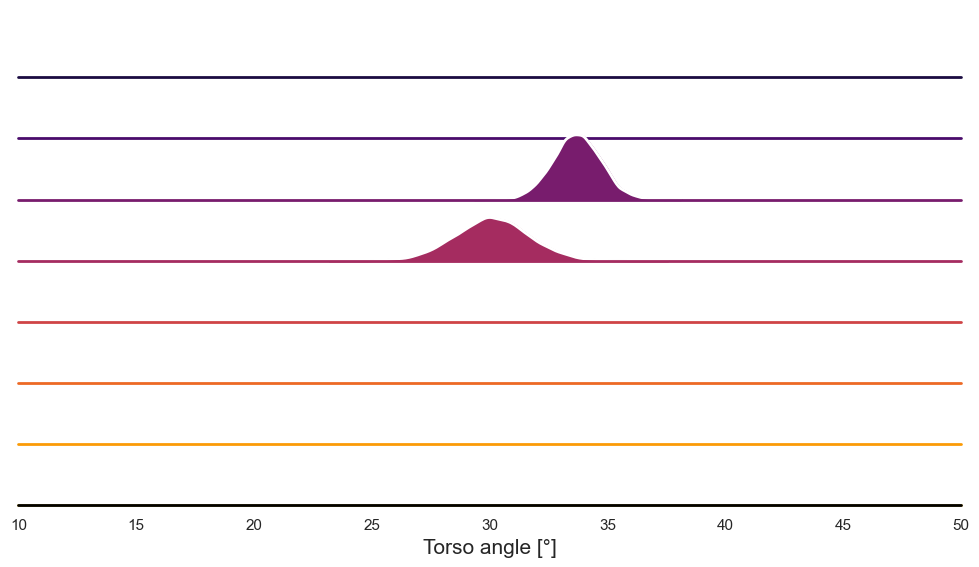

In [188]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='inferno', n_colors=8)
# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(concatenated2, row='variable', hue="variable", aspect=14, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'value',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'value', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
# here we add a vertical line for each plot
g.map(plt.axvline, x=0,
      lw=2, clip_on=True, color='gray')

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# here we add a horizontal line for each plot

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
#for i, ax in enumerate(g.axes.flat):
#     ax.text(24.5, 0.02, columns_list[i],
#             fontweight='bold', fontsize=15,
#             color=ax.lines[-1].get_color())

plt.axhline(y=0,      lw=2, clip_on=False, color='black')
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.1)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(10, 50))


plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Torso angle [°]', fontsize=15)
# g.fig.suptitle('Torso position',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

# save fig with now background
g.savefig('torso_posterior_samples_update3.png', dpi=300, bbox_inches='tight', transparent=True)

In [189]:
first_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Classic Male"]
second_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Classic Female"]
third_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Hybrid Male"]
fourth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Hybrid Female"]
fifth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Race Male"]
sixth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Race Female"]
seventh_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Ebike Male"]
eighth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Ebike Female"]

first_column.loc[:,"value"] = 0
second_column.loc[:,"value"] = 0
third_column.loc[:,"value"] = 0
fourth_column.loc[:,"value"] = 0
# fifth_column.loc[:,"value"] = 0
# sixth_column.loc[:,"value"] = 0
seventh_column.loc[:,"value"] = 0
eighth_column.loc[:,"value"] = 0
concatenated3 = pd.concat([first_column ,second_column, third_column, fourth_column, fifth_column,sixth_column,seventh_column,eighth_column])

c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData

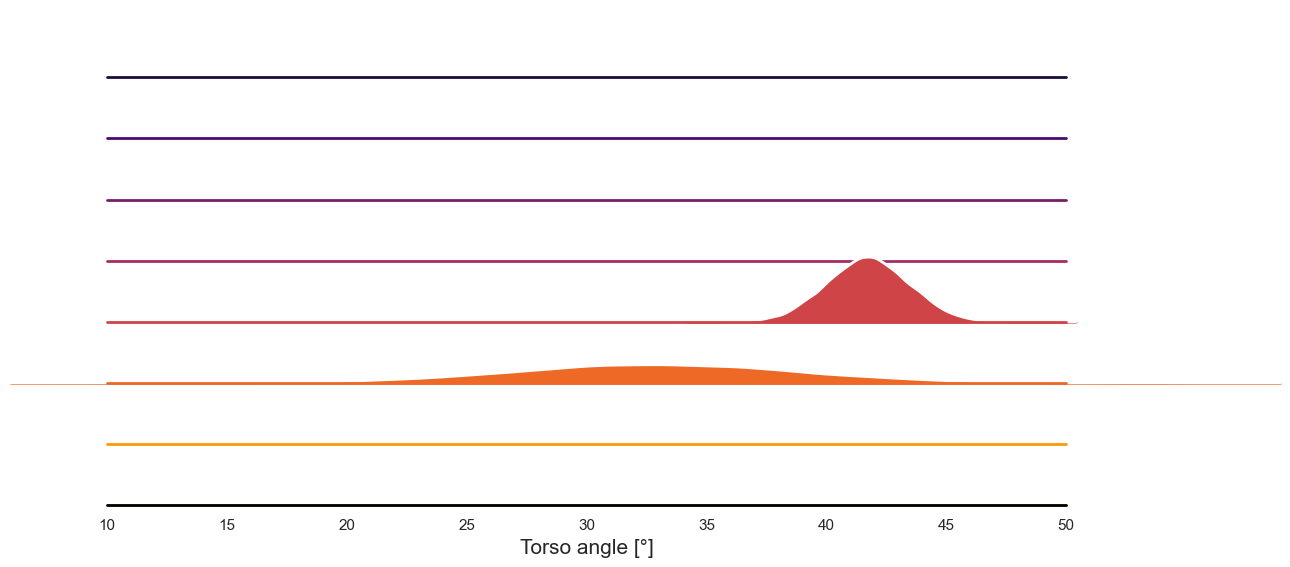

In [190]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='inferno', n_colors=8)
# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(concatenated3, row='variable', hue="variable", aspect=14, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'value',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'value', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
# here we add a vertical line for each plot
g.map(plt.axvline, x=0,
      lw=2, clip_on=True, color='gray')

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# here we add a horizontal line for each plot

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
#for i, ax in enumerate(g.axes.flat):
#     ax.text(24.5, 0.02, columns_list[i],
#             fontweight='bold', fontsize=15,
#             color=ax.lines[-1].get_color())

plt.axhline(y=0,      lw=2, clip_on=False, color='black')
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.1)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(10, 50))


plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Torso angle [°]', fontsize=15)
# g.fig.suptitle('Torso position',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

# save fig with now background
g.savefig('torso_posterior_samples_update4.png', dpi=300, bbox_inches='tight', transparent=True)

In [192]:
first_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Classic Male"]
second_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Classic Female"]
third_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Hybrid Male"]
fourth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Hybrid Female"]
fifth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Race Male"]
sixth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Race Female"]
seventh_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Ebike Male"]
eighth_column = torso_posterior_melted[torso_posterior_melted['variable'] == "Ebike Female"]

first_column.loc[:,"value"] = 0
second_column.loc[:,"value"] = 0
third_column.loc[:,"value"] = 0
fourth_column.loc[:,"value"] = 0
fifth_column.loc[:,"value"] = 0
sixth_column.loc[:,"value"] = 0
# seventh_column.loc[:,"value"] = 0
# eighth_column.loc[:,"value"] = 0
concatenated4 = pd.concat([first_column ,second_column, third_column, fourth_column, fifth_column,sixth_column,seventh_column,eighth_column])

c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData

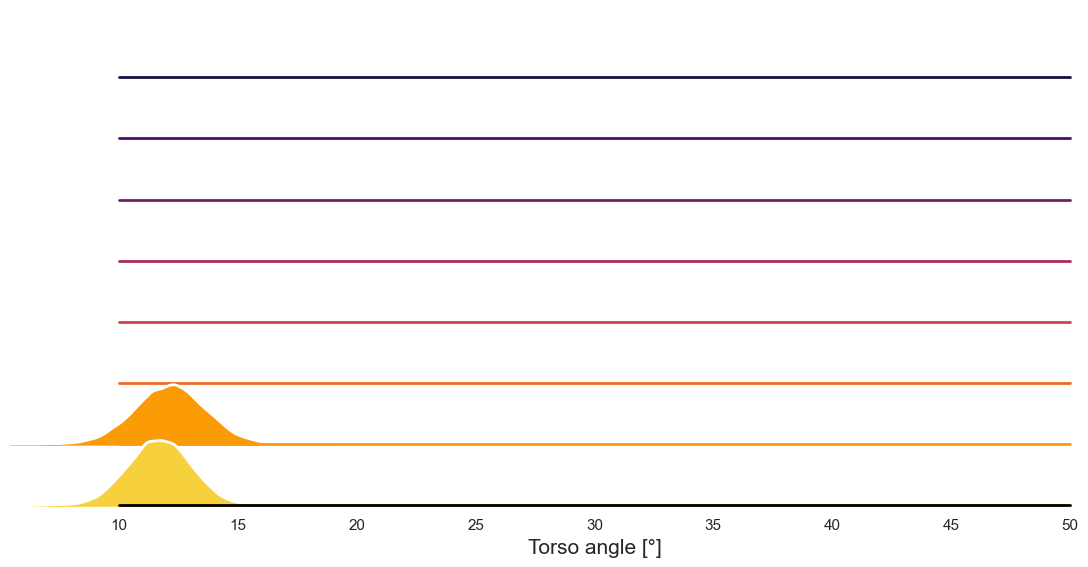

In [193]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='inferno', n_colors=8)
# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(concatenated4, row='variable', hue="variable", aspect=14, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'value',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'value', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
# here we add a vertical line for each plot
g.map(plt.axvline, x=0,
      lw=2, clip_on=True, color='gray')

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# here we add a horizontal line for each plot

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
#for i, ax in enumerate(g.axes.flat):
#     ax.text(24.5, 0.02, columns_list[i],
#             fontweight='bold', fontsize=15,
#             color=ax.lines[-1].get_color())

plt.axhline(y=0,      lw=2, clip_on=False, color='black')
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.1)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(10, 50))


plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Torso angle [°]', fontsize=15)
# g.fig.suptitle('Torso position',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

# save fig with now background
g.savefig('torso_posterior_samples_update5.png', dpi=300, bbox_inches='tight', transparent=True)

c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData\Local\anaconda3\envs\yolo\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
c:\Users\chiarar\AppData

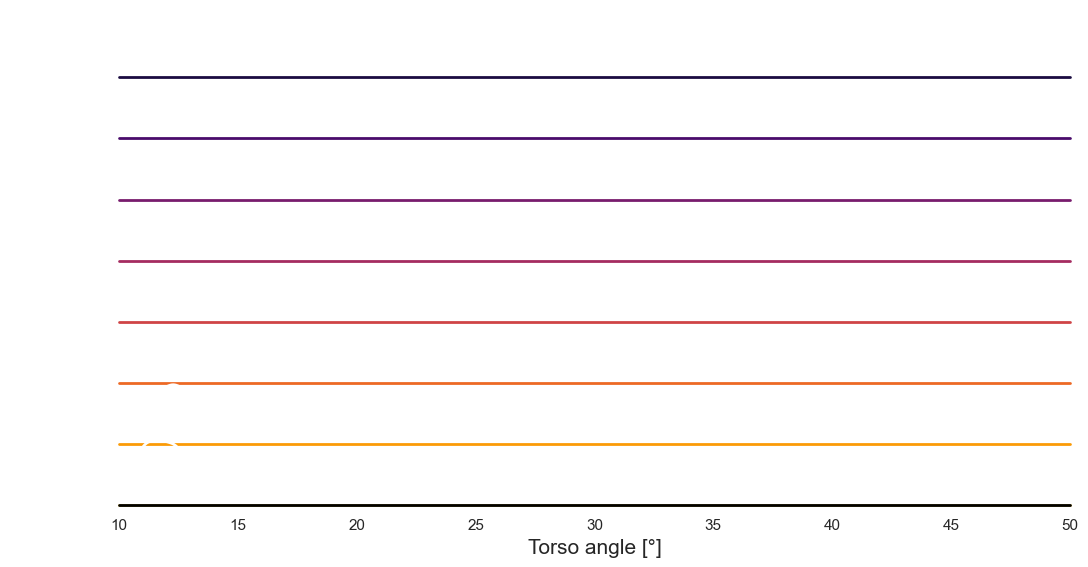

In [195]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='inferno', n_colors=8)
# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(concatenated4, row='variable', hue="variable", aspect=14, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
# g.map(sns.kdeplot, 'value',
#       bw_adjust=1, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'value', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
# here we add a vertical line for each plot
g.map(plt.axvline, x=0,
      lw=2, clip_on=True, color='gray')



# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# here we add a horizontal line for each plot

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
#for i, ax in enumerate(g.axes.flat):
#     ax.text(24.5, 0.02, columns_list[i],
#             fontweight='bold', fontsize=15,
#             color=ax.lines[-1].get_color())

plt.axhline(y=0,      lw=2, clip_on=False, color='black')
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.1)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xlim=(10, 50))


plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Torso angle [°]', fontsize=15)
# g.fig.suptitle('Torso position',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()


## ARM angle

In [196]:
# read data from the posterior samples of the arm model
arm_posterior = pd.read_csv('1_Bayesian_regression_model/arm_posterior_samples_update_malebaseline_new.csv')
# Rename the columns of arm_posterior
arm_posterior = arm_posterior[['baseline_male_classic_traditional','female_classic_traditional','male_hybrid_traditional','female_hybrid_traditional', 'male_race_traditional','female_race_traditional','male_classic_ebike','female_classic_ebike']] # only select relevant columns
arm_posterior.columns = ["Classic Male", "Classic Female", "Hybrid Male","Hybrid Female", "Race Male","Race Female", "Ebike Male", "Ebike Female"]
# Melt the dataframe to long format for seaborn - to adapt to hue plot format
arm_posterior_melted = arm_posterior.melt(var_name='variable', value_name='value')
columns_list = ["Classic Male", "Classic Female", "Hybrid Male","Hybrid Female", "Race Male","Race Female", "Ebike Male", "Ebike Female"]

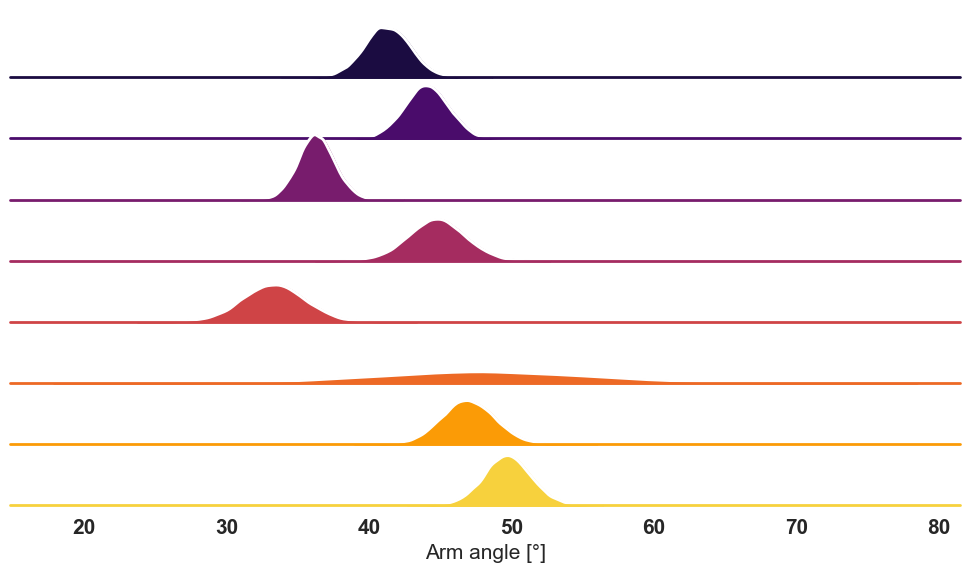

In [199]:
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='inferno', n_colors=8)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(arm_posterior_melted, row='variable', hue="variable", aspect=14, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'value',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'value', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
# # here we add a vertical line for each plot
# g.map(plt.axvline, x=0,
#       lw=2, clip_on=True, color='gray')

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
      print()
#     ax.text(24.5, 0.02, columns_list[i],
#             fontweight='bold', fontsize=15,
#             color=ax.lines[-1].get_color())


# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.1)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# g.set(xlim=(-12, 25))

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Arm angle [°]', fontsize=15)
# g.fig.suptitle('Arm position',
#                ha='right',
#                fontsize=20,
#                fontweight=20)

plt.show()

# save fig with now background
g.savefig('Arm_posterior_samples_update.png', dpi=300, bbox_inches='tight', transparent=True)